<a href="https://colab.research.google.com/github/lovishdany/DL_NCU/blob/main/Experiment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aim: Use Neural NEtworks to classify Diabetic patient and find accuracy of the model.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step1. Train Test Split
Step2. Scaling
Step3. Create the model

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(["Outcome"], axis = 1)
y = data["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#Create the Model

model = Sequential([
    Dense(8, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.1),
    metrics = (["accuracy"])
)

In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs= 600)

Epoch 1/600
20/20 [==============================] - 3s 36ms/step - loss: 0.6376 - accuracy: 0.6368 - val_loss: 0.5679 - val_accuracy: 0.7273
Epoch 2/600
20/20 [==============================] - 0s 8ms/step - loss: 0.5563 - accuracy: 0.7101 - val_loss: 0.5539 - val_accuracy: 0.6623
Epoch 3/600
20/20 [==============================] - 0s 10ms/step - loss: 0.5096 - accuracy: 0.7264 - val_loss: 0.5318 - val_accuracy: 0.7078
Epoch 4/600
20/20 [==============================] - 0s 13ms/step - loss: 0.5355 - accuracy: 0.7150 - val_loss: 0.5043 - val_accuracy: 0.7143
Epoch 5/600
20/20 [==============================] - 0s 14ms/step - loss: 0.4782 - accuracy: 0.7655 - val_loss: 0.4546 - val_accuracy: 0.7662
Epoch 6/600
20/20 [==============================] - 0s 9ms/step - loss: 0.5044 - accuracy: 0.7492 - val_loss: 0.4658 - val_accuracy: 0.7662
Epoch 7/600
20/20 [==============================] - 0s 10ms/step - loss: 0.4721 - accuracy: 0.7801 - val_loss: 0.5571 - val_accuracy: 0.7078
Epoch 8/

In [ ]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

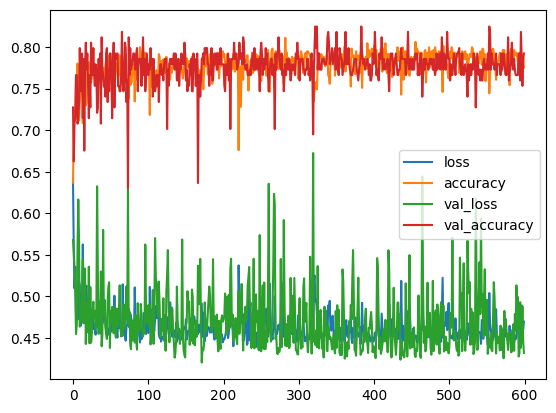

In [ ]:
model_loss.plot()

In [ ]:
preds = model.predict(X_test)
preds = [1 if i > 0.5 else 0 for i in preds]

5/5 [==============================] - 0s 2ms/step


In [ ]:
print(preds)

[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        95
           1       0.78      0.64      0.70        59

    accuracy                           0.79       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
print(confusion_matrix(y_test,preds))

[[84 11]
 [21 38]]


<Axes: >

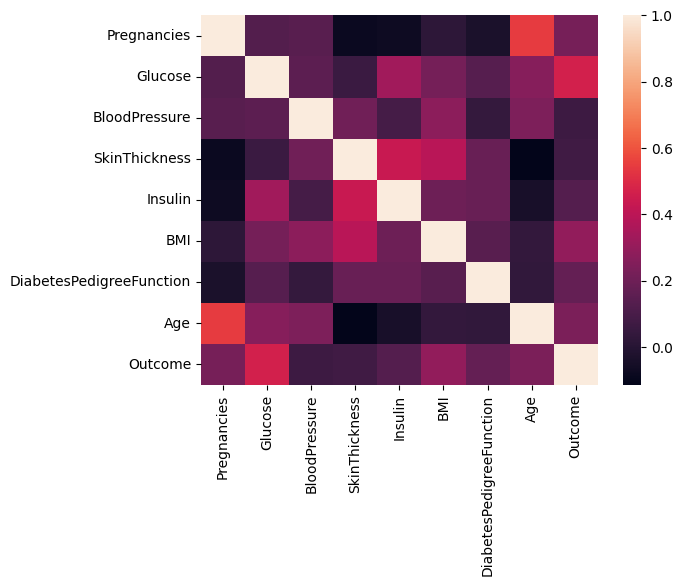

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())